Time: 0s, Velocity: 301.91m/s, Altitude: 2010m, Kinetic Energy: 455748240.50, Potential Energy: 197181000.00, Turn Radius: 30971.68m, Angle Change: 0.00 radians
Time: 1s, Velocity: 303.82m/s, Altitude: 2020m, Kinetic Energy: 461529469.15, Potential Energy: 198162000.00, Turn Radius: 31364.56m, Angle Change: 0.00 radians
Time: 2s, Velocity: 305.73m/s, Altitude: 2030m, Kinetic Energy: 467343599.93, Potential Energy: 199143000.00, Turn Radius: 31759.67m, Angle Change: 0.00 radians
Time: 3s, Velocity: 307.63m/s, Altitude: 2040m, Kinetic Energy: 473190546.44, Potential Energy: 200124000.00, Turn Radius: 32157.02m, Angle Change: 0.00 radians
Time: 4s, Velocity: 309.54m/s, Altitude: 2050m, Kinetic Energy: 479070221.85, Potential Energy: 201105000.00, Turn Radius: 32556.59m, Angle Change: 0.00 radians
Time: 5s, Velocity: 311.44m/s, Altitude: 2060m, Kinetic Energy: 484982538.93, Potential Energy: 202086000.00, Turn Radius: 32958.38m, Angle Change: 0.00 radians
Time: 6s, Velocity: 313.35m/s, Alt

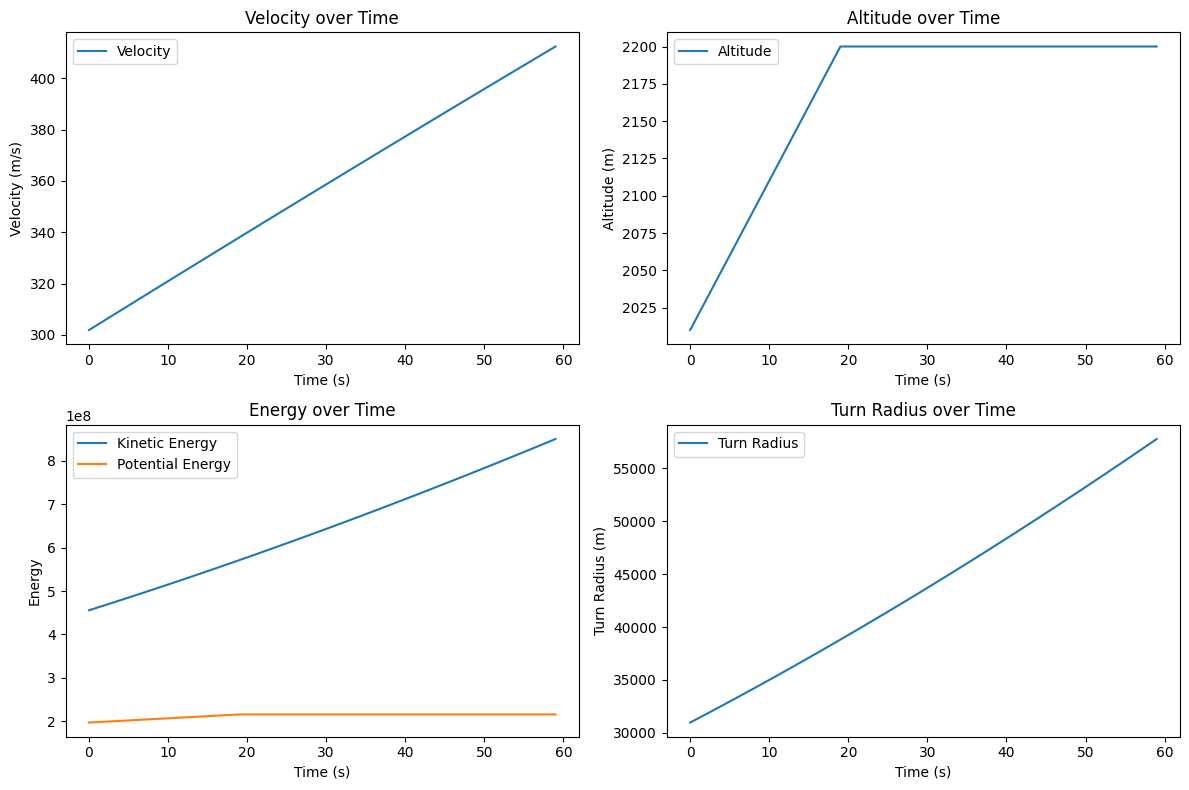

In [14]:
import sys
sys.path.append('/workspaces/emt')
import emt

import matplotlib.pyplot as plt

fighter_jet = emt.Aircraft(mass=10000, engine_thrust=20000, drag_coefficient=0.02, lift_coefficient=0.3)

# Initial conditions
velocity = 300  # m/s
altitude = 2000  # meters
time_step = 1  # second

# Lists to store data for plotting
times = []
velocities = []
altitudes = []
kinetic_energies = []
potential_energies = []
turn_radii = []

# Simulation loop
for t in range(60):
    # Update velocity
    velocity = fighter_jet.update_velocity(velocity, time_step)

    # Simulate a climb for the first 20 seconds
    if t < 20:
        altitude += 10  # Climbing 10 meters every second

    # Simulate a turn for the next 20 seconds
    if 20 <= t < 40:
        angle_change = fighter_jet.update_orientation(velocity, time_step, turning=True)
    else:
        angle_change = fighter_jet.update_orientation(velocity, time_step, turning=False)

    # Calculate and print energy states and turn information
    kinetic_energy = fighter_jet.kinetic_energy(velocity)
    potential_energy = fighter_jet.potential_energy(altitude)
    turn_radius = fighter_jet.turn_radius(velocity)
    print(f"Time: {t}s, Velocity: {velocity:.2f}m/s, Altitude: {altitude}m, "
          f"Kinetic Energy: {kinetic_energy:.2f}, Potential Energy: {potential_energy:.2f}, "
          f"Turn Radius: {turn_radius:.2f}m, Angle Change: {angle_change:.2f} radians")


    # Store data for plotting
    times.append(t)
    velocities.append(velocity)
    altitudes.append(altitude)
    kinetic_energies.append(fighter_jet.kinetic_energy(velocity))
    potential_energies.append(fighter_jet.potential_energy(altitude))
    turn_radii.append(fighter_jet.turn_radius(velocity))

# Plotting
plt.figure(figsize=(12, 8))

# Velocity plot
plt.subplot(2, 2, 1)
plt.plot(times, velocities, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity over Time')
plt.legend()

# Altitude plot
plt.subplot(2, 2, 2)
plt.plot(times, altitudes, label='Altitude')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude over Time')
plt.legend()

# Energy plot
plt.subplot(2, 2, 3)
plt.plot(times, kinetic_energies, label='Kinetic Energy')
plt.plot(times, potential_energies, label='Potential Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Energy over Time')
plt.legend()

# Turn radius plot
plt.subplot(2, 2, 4)
plt.plot(times, turn_radii, label='Turn Radius')
plt.xlabel('Time (s)')
plt.ylabel('Turn Radius (m)')
plt.title('Turn Radius over Time')
plt.legend()

plt.tight_layout()
plt.show()